<a href="https://colab.research.google.com/github/mancai111/Rett_Mouse/blob/main/Heatmap_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Paths

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/TestCase/heatmap_y_axis_correct/'

curr = '/content/drive/My Drive/TestCase/preprocessed_data/'

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import dot
from scipy import stats
from numpy.linalg import norm
import matplotlib.pyplot as plt
from collections import defaultdict

os.chdir(abspath_curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/heatmap_y_axis_correct


In [3]:
os.chdir(curr)
print(os.getcwd())

/content/drive/My Drive/TestCase/preprocessed_data


# Coordinate Heatmap Method

In [5]:
def left_right_paw_heatmap(wb, speed, day, mouse):
    # read the paw movement data
    sample = pd.read_excel(wb, speed+' pawMovement').iloc[:,1:]
    
    # get LX, LY, RX, RY, round them to closet digit, and turn them into numpy form
    LX = sample.iloc[:,0]
    LX = np.rint(LX.to_numpy())


    LY = sample.iloc[:,1]
    LY = np.rint(LY.to_numpy())

    RX = sample.iloc[:,2]
    RX = np.rint(RX.to_numpy())

    RY = sample.iloc[:,3]
    RY = np.rint(RY.to_numpy())

    # organize a list of (x,y) coordinates
    coords_list_L = [i for i in zip(LX,LY)]
    coords_list_R = [i for i in zip(RX,RY)]
    coords_list = coords_list_L + coords_list_R

    # count the frequency of each (x,y) coordinate pair
    d = defaultdict(int)
    for i in coords_list:       
        d[i] += 1
        
    coords = [i for i in map(list, zip(*d.keys()))]
    
    # build a dataframe that has x-coord as column and y-coord as row
    column_list = [int(i) for i in sorted(set(coords[0]))]
    index_list = [int(i) for i in sorted(set(coords[1]))]

    df = pd.DataFrame(columns = column_list, index = index_list)

    # fill the values (frequency count)
    key_list, value_list = list(d.keys()), list(d.values())
    for i in range(len(d.keys())):
        df.loc[key_list[i][1], key_list[i][0]] = value_list[i]
    
    for i in np.arange(min(column_list),max(column_list)):
        if i not in df.columns:
            df[i] = np.nan
            
    for i in np.arange(min(index_list),max(column_list)):
        if i not in df.index:
            df.loc[i] = np.nan

    df = df.sort_index(axis=1)
    df = df.sort_index(axis=0)
    df = df.fillna(0)

    x_min_lim = 50
    x_max_lim = 300
    y_min_lim = 50
    y_max_lim = 200

    empty_col = [0 for _ in range(len(df))]

    if min(df.columns) > x_min_lim:
      for i in range(min(df.columns)-1, x_min_lim-1, -1):
        df.insert(loc = 0,
                  column = i,
                  value = empty_col)
    if max(df.columns) < x_max_lim:
      for i in range(max(df.columns)+1, x_max_lim+1):
        df[i] = empty_col


    df = df.T
    empty_col = [0 for _ in range(len(df))]

    if min(df.columns) > y_min_lim:
      for i in range(min(df.columns)-1, y_min_lim-1, -1):
        df.insert(loc = 0,
                  column = i,
                  value = empty_col)
    if max(df.columns) < y_max_lim:
      for i in range(max(df.columns)+1, y_max_lim+1):
        df[i] = empty_col    

    df = df.T

    # construct heatmap with the right dataframe
    img_savePath = abspath_curr+mouse+'/'
    
    if not os.path.exists(img_savePath):
        os.makedirs(img_savePath)

    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title(mouse+': Frequncy Count of X-Y for Paw Movement at ' + speed + ' on Day '+str(day))
    sns.heatmap(df)
    plt.ylim(0,200)

    # save the heatmap pictures
    plt.savefig(img_savePath+'Day'+str(day)+'_'+speed+'.png')
    plt.close()



# Executing the Method

In [ ]:
# Necessary elements of speeds and mice

speed_list = ['fup0','fup15','fup30','fup45','fup60',
              'fdown60','fdown45','fdown30','fdown15','fdown0']

wild_list = ['NC436-M-WT', 'NC443-M-WT', 'NC506-M-WT', 'NC538-M-WT', 'NC541-M-WT', 'NC542-M-WT', 'NC544-M-WT', 'NC771-M-WT', 'NC772-M-WT', 'NC786-M-WT', 'NC804-M-WT']
rett_list = ['NC437-M-NL', 'NC440-M-NL', 'NC442-M-NL', 'NC539-M-NL', 'NC540-M-NL', 'NC545-M-NL', 'NC770-M-NL', 'NC773-M-NL', 'NC787-M-NL', 'NC790-M-NL', 'NC797-M-NL', 'NC802-M-NL']

In [ ]:
# Read all mice data, generate the heatmap series for every mouse, and save to the folder

l = wild_list +rett_list

for i in l:
  len_days = len([name for name in os.listdir(curr+i+' alignedNeuronPaw/')])
  for d in range(1,len_days+1):
    wb = i+' alignedNeuronPaw/'+i+'-Day'+str(d)+'_aligned.xlsx'
    for s in speed_list:
      left_right_paw_heatmap(wb, s, d, i)

# Zoomed-in Illustration of Sample

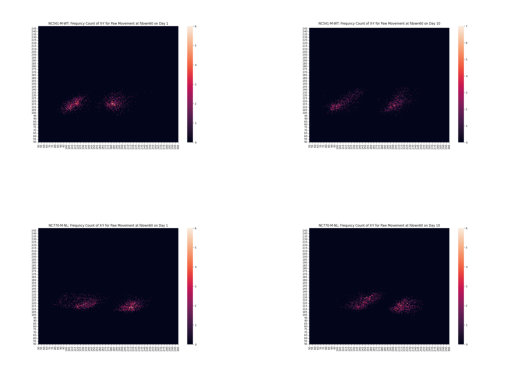

In [9]:
# Present the sample: NC541 WT and NC770 NL on Day1 and Day10 with status of fdown60

sample_img_541_1 = plt.imread(abspath_curr + 'NC541-M-WT/' + 'Day1' +'_fdown60.png')
sample_img_541_10 = plt.imread(abspath_curr + 'NC541-M-WT/' + 'Day10' +'_fdown60.png')

sample_img_770_1 = plt.imread(abspath_curr + 'NC770-M-NL/' + 'Day1' +'_fdown60.png')
sample_img_770_10 = plt.imread(abspath_curr + 'NC770-M-NL/' + 'Day10' +'_fdown60.png')


# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(sample_img_541_1)
axs[0,0].axis('off')

axs[0,1].imshow(sample_img_541_10)
axs[0,1].axis('off')

axs[1,0].imshow(sample_img_770_1)
axs[1,0].axis('off')

axs[1,1].imshow(sample_img_770_10)
axs[1,1].axis('off')

plt.show()

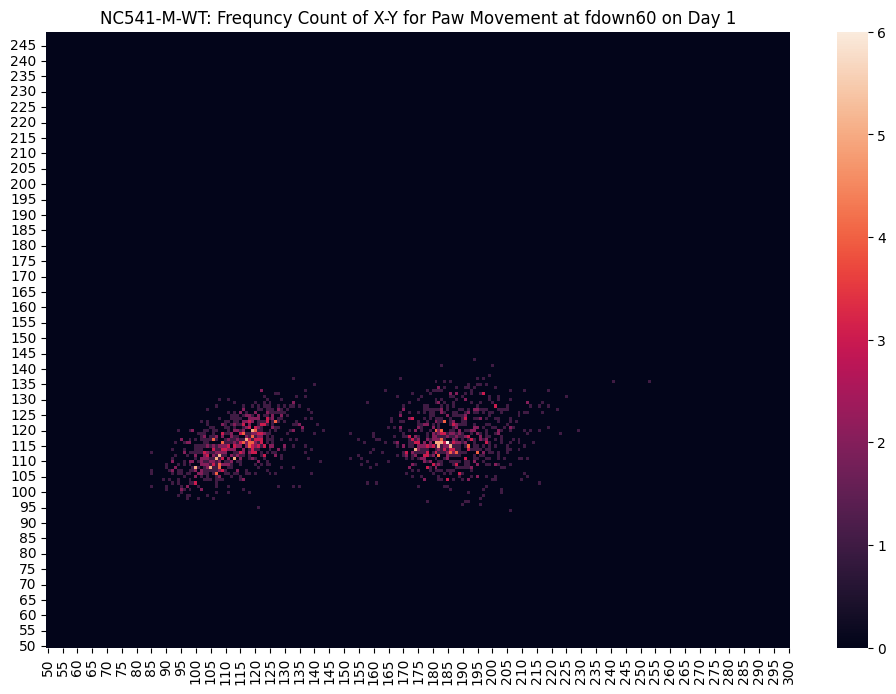

In [11]:
# Use plt.show() instead of plt.savefig() in the function to present a larger picture of heatmap

wb = 'NC541-M-WT alignedNeuronPaw/NC541-M-WT-Day1_aligned.xlsx'
left_right_paw_heatmap(wb, 'fdown60', '1', 'NC541-M-WT')

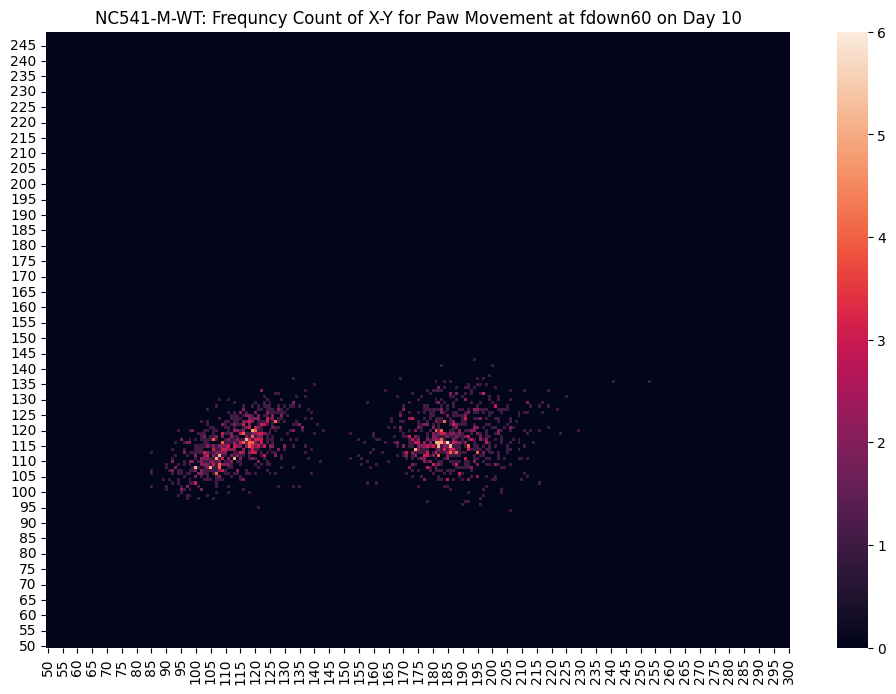

In [13]:
wb = 'NC541-M-WT alignedNeuronPaw/NC541-M-WT-Day1_aligned.xlsx'
left_right_paw_heatmap(wb, 'fdown60', '10', 'NC541-M-WT')

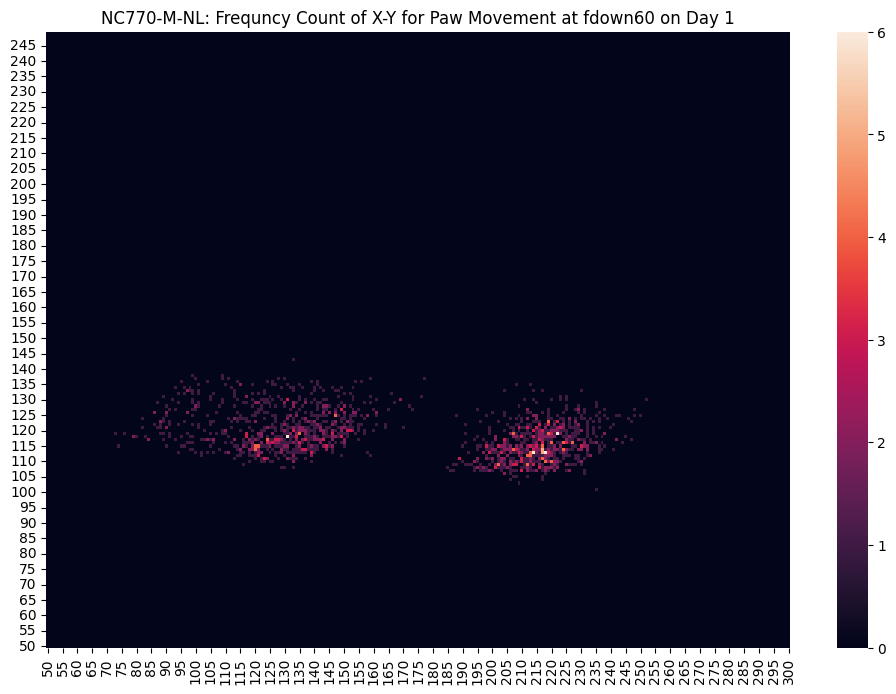

In [14]:
wb = 'NC770-M-NL alignedNeuronPaw/NC770-M-NL-Day1_aligned.xlsx'
left_right_paw_heatmap(wb, 'fdown60', '1', 'NC770-M-NL')

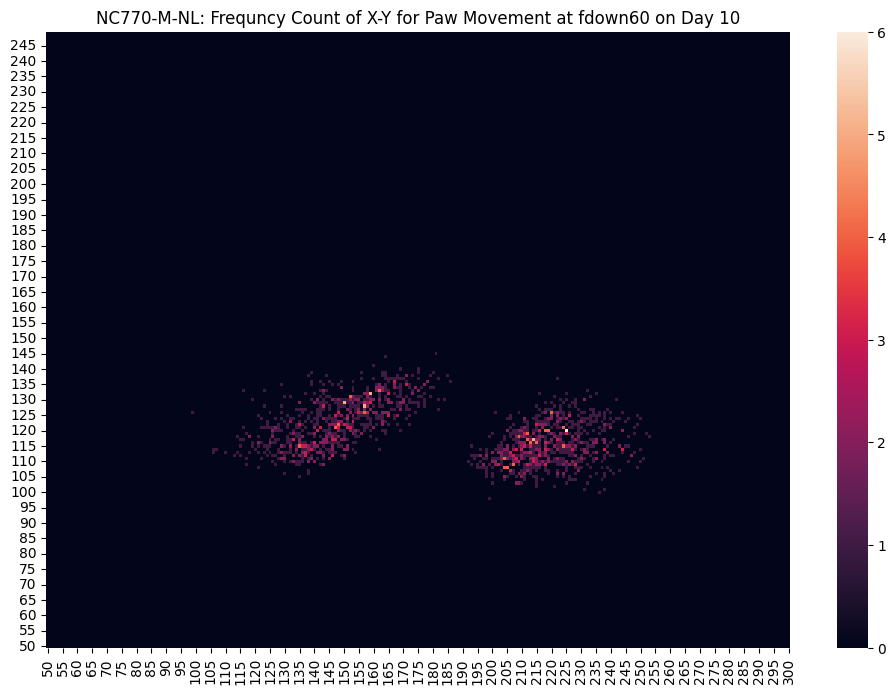

In [15]:
wb = 'NC770-M-NL alignedNeuronPaw/NC770-M-NL-Day10_aligned.xlsx'
left_right_paw_heatmap(wb, 'fdown60', '10', 'NC770-M-NL')